### **Name:** Anastasios Papapanagiotou
### **ID:** 3200143
### **Email:** p3200143@aueb.gr
### **Google colab link:** https://colab.research.google.com/drive/1U9MhQI8pwIvMES5KcoNVHBS1QwEaR6_P

For better readability you can use the google colab link (use the google forms and collapse chapters).

# Imports and Constants

In [1]:
# @title Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression as LinearRegressionSklearn
from sklearn.linear_model import LogisticRegression as LogisticRegressionSklearn
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster as cluster
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import torch.utils.data as data

import warnings
warnings.filterwarnings('ignore')


In [2]:
# @title Constants

COLORS = ['#2B2F42', '#EF233C', '#8D99AE', '#6482AD', '#BC9F8B',
          '#FF8225', '#E3A5C7', '#914F1E', '#BEC6A0', '#FFC7ED']

np.set_printoptions(suppress=True, precision=5)
SIZE_DEFAULT = 12
SIZE_LARGE = 14
plt.rc('font', weight='normal')
plt.rc('font', size=SIZE_DEFAULT)
plt.rc('axes', titlesize=SIZE_LARGE)
plt.rc('axes', labelsize=SIZE_LARGE)
plt.rc('xtick', labelsize=SIZE_DEFAULT)
plt.rc('ytick', labelsize=SIZE_DEFAULT)

# Dataset

In [7]:
# @title Load dataset
!curl -L -o air-quality-and-pollution-assessment.zip https://www.kaggle.com/api/v1/datasets/download/mujtabamatin/air-quality-and-pollution-assessment
!unzip -o air-quality-and-pollution-assessment.zip

dataset = pd.read_csv('updated_pollution_dataset.csv')
print('\nSuccessfully loaded dataset.')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 86068  100 86068    0     0  91634      0 --:--:-- --:--:-- --:--:--  289k
Archive:  air-quality-and-pollution-assessment.zip
  inflating: updated_pollution_dataset.csv  

Successfully loaded dataset.


## Dataset overview

Dataset used: [Air quality and pollution](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data)

**Dataset size**: 5000 rows
<br/>
<br/>

## Features
9 total features:

| Label | Type | Description |
|---|---|---|
| Temperature | Numerical (degrees celcius) | Average temperature of the region. |
| Humidity % | Numerical (percentage) | Relative humidity recorded in the region. |
| PM2.5 Concentration | Numerical (measured in µg/m³) | Fine particulate matter levels. |
| PM10 Concentration | Numerical (measured in µg/m³) | Coarse particulate matter levels. |
| NO2 Concentration | Numerical (measured in ppb) | Nitrogen dioxide levels. |
| SO2 Concentration | Numerical (measured in ppb) | Sulfur dioxide levels. |
| CO Concentration | Numerical (measured in ppm) | Carbon monoxide levels. |
| Proximity to Industrial Areas | Numerical (measured in km) | Distance to the nearest industrial zone. |
| Population Density | Numerical (measured in people/km²) | Number of people per square kilometer in the region. |

## Task
The task is to find the quality of the air and classify it as <u>good</u> (clean air with low pollution levels), <u>moderate</u> (acceptable air quality with some pollution), <u>poor</u> (noticeable pollution), <u>hazardous</u> (highly polluted air).

## Data vizualization

In [8]:
# @title Dataset head
dataset.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [9]:
# @title Dataset descriptive statistics
dataset.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


Text(0.5, 1.0, 'Population Density')

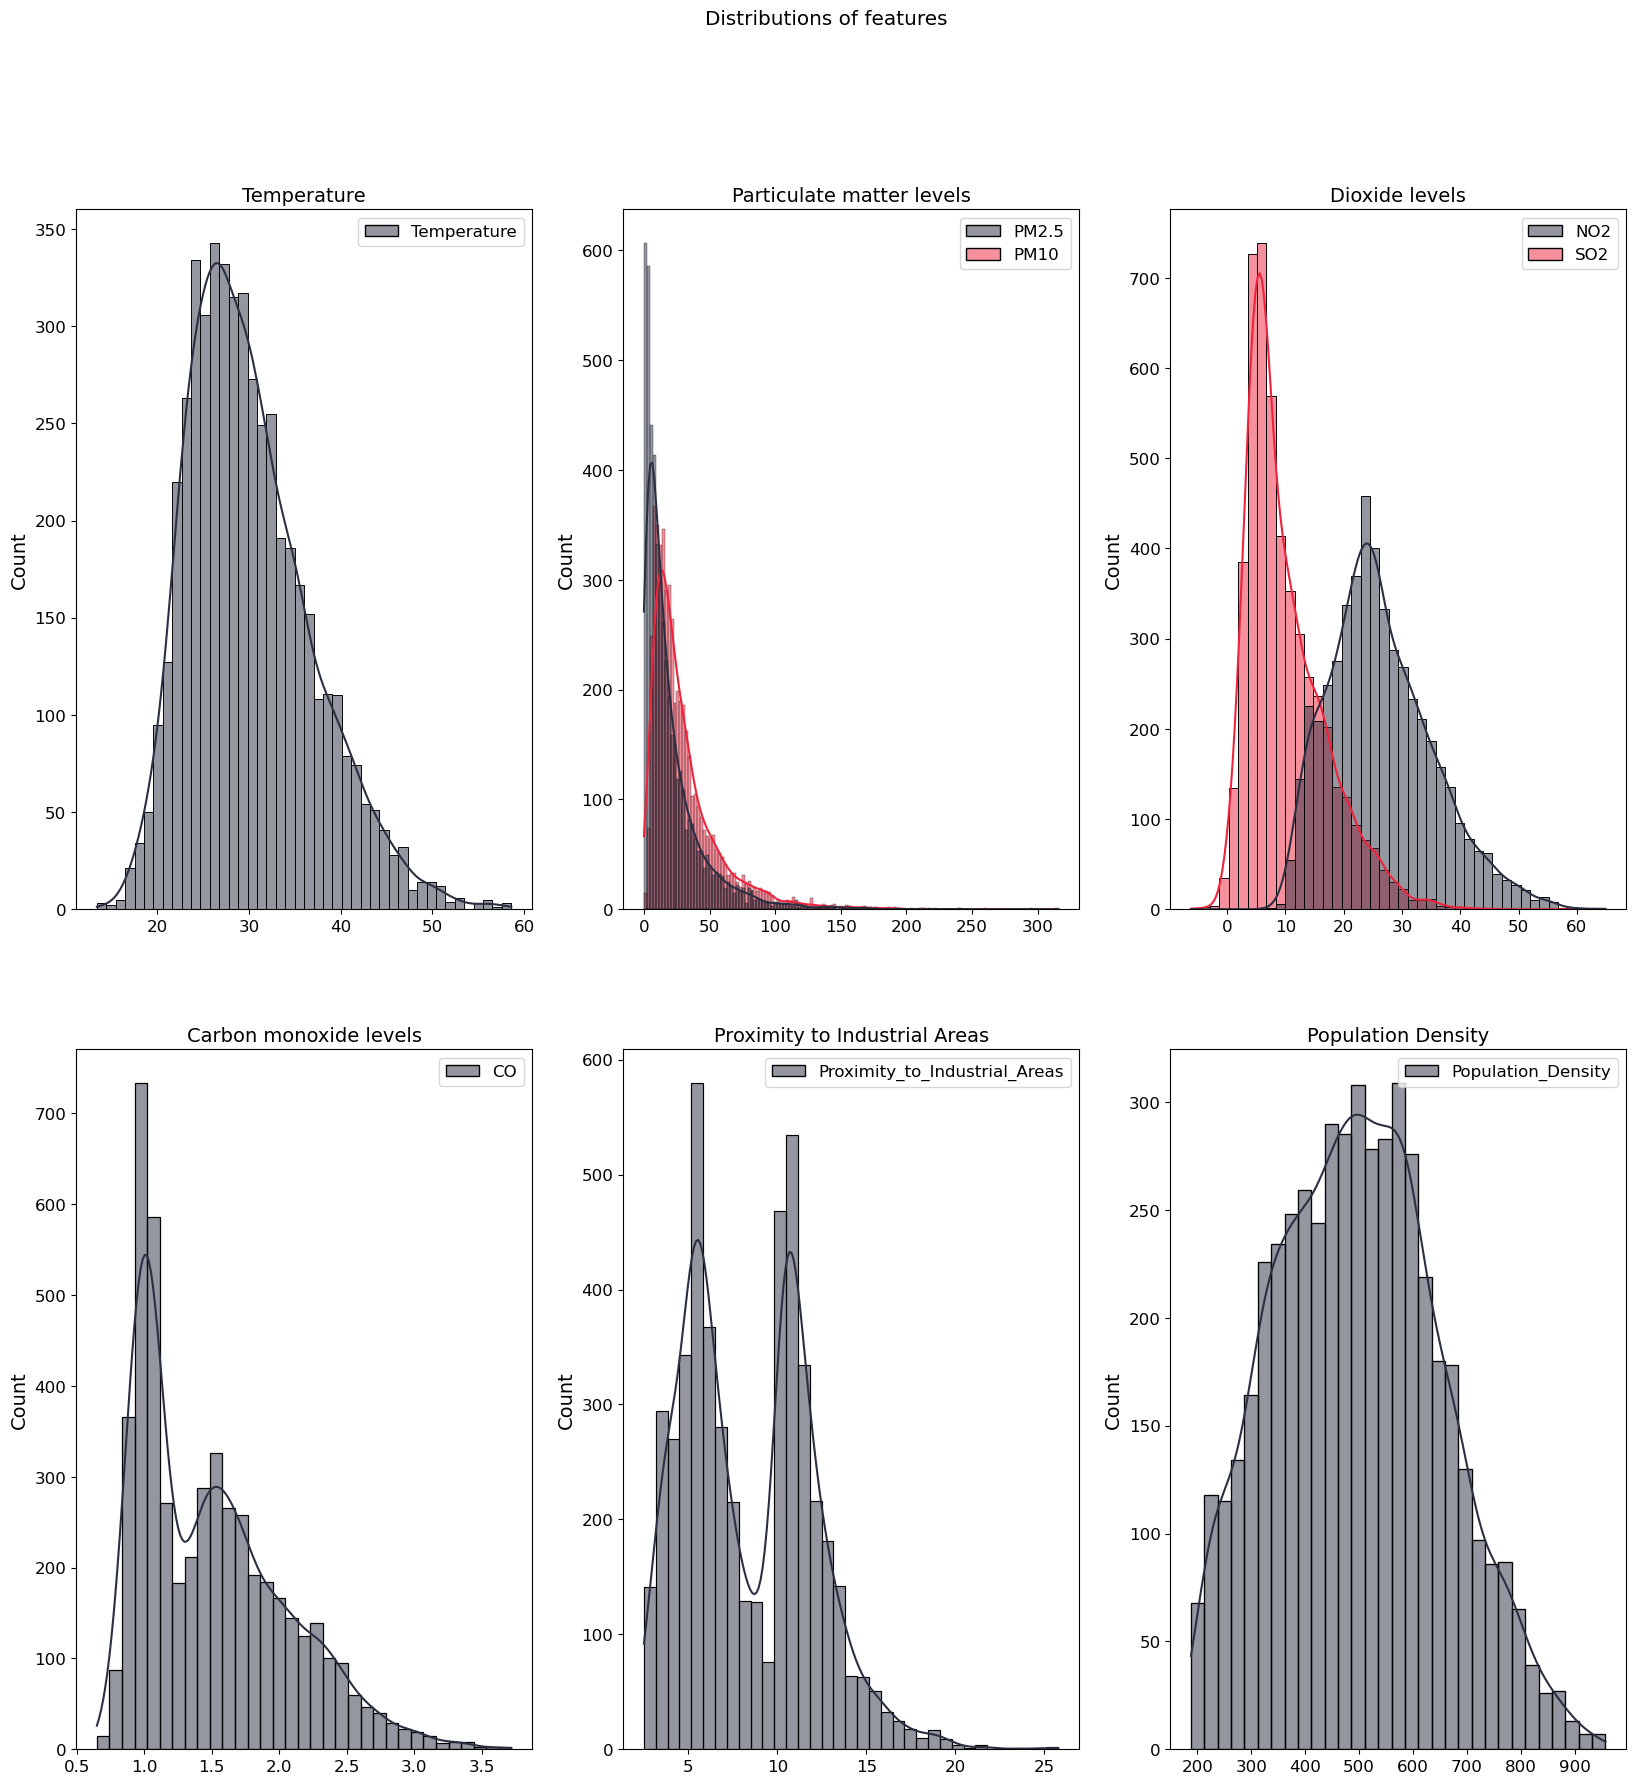

In [10]:
# @title Distributions of features

fig, ax = plt.subplots(2, 3, figsize=(20,20))
fig.suptitle('Distributions of features')

sns.histplot(dataset[['Temperature']], kde=True, palette=COLORS, ax=ax[0, 0])
ax[0, 0].set_title('Temperature')

sns.histplot(dataset[['PM2.5', 'PM10']], kde=True, palette=COLORS, ax=ax[0, 1])
ax[0, 1].set_title('Particulate matter levels')

sns.histplot(dataset[['NO2', 'SO2']], kde=True, palette=COLORS, ax=ax[0, 2])
ax[0, 2].set_title('Dioxide levels')

sns.histplot(dataset[['CO']], kde=True, palette=COLORS, ax=ax[1, 0])
ax[1, 0].set_title('Carbon monoxide levels')

sns.histplot(dataset[['Proximity_to_Industrial_Areas']], kde=True, palette=COLORS, ax=ax[1, 1])
ax[1, 1].set_title('Proximity to Industrial Areas')

sns.histplot(dataset[['Population_Density']], kde=True, palette=COLORS, ax=ax[1, 2])
ax[1, 2].set_title('Population Density')

# Data Preprocessing

In [11]:
# @title Split dataset into train and test set

test_size = 0.3 # @param{type:"number", max:1, min:0}
x, y = dataset.drop(columns=['Air Quality']), dataset['Air Quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values
y_train_labels, y_train = np.unique(y_train, return_inverse=True)
y_test_labels, y_test = np.unique(y_test, return_inverse=True)
print(f'Train set size: {x_train.shape[0]}, test set size: {x_test.shape[0]}')

Train set size: 3500, test set size: 1500


In [12]:
# @title Normalize dataset

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

labels = np.unique(y_train)

# Algorithms

## PCA

We use numpy to calculate the eigenvectors and eigenvalues (sorted). We keep the M largest. We then use these to find the reduced dimension of the input.

In [13]:
# @title PCA Algorithm

class PCA:
  def __init__(self, M):
    self.M = M

  def eigsort(self, A):
    eigen_vals, U = np.linalg.eig(A)
    order = np.argsort(eigen_vals)[::-1]
    return U[:, order], eigen_vals[order]

  def fit(self, X):
    mu = X.mean(axis=0).reshape((1,-1))

    normalized_X = X-mu

    S = (1/X.shape[0]) * normalized_X.T.dot(normalized_X)
    eigen_vecs, eigen_vals = self.eigsort(S)
    U = eigen_vecs[:, :self.M]
    lambdas = eigen_vals[:self.M]

    Z = normalized_X.dot(U)
    print(f'Initial shape: {X.shape}, reduced shape: {Z.shape}')
    return Z, U, lambdas, mu

num_of_components = 3 # @param{type:"number", min: 2, max: 9}
pca = PCA(num_of_components)
Z_train, U_train, lambdas_train, mu_train = pca.fit(x_train)

Initial shape: (3500, 9), reduced shape: (3500, 3)


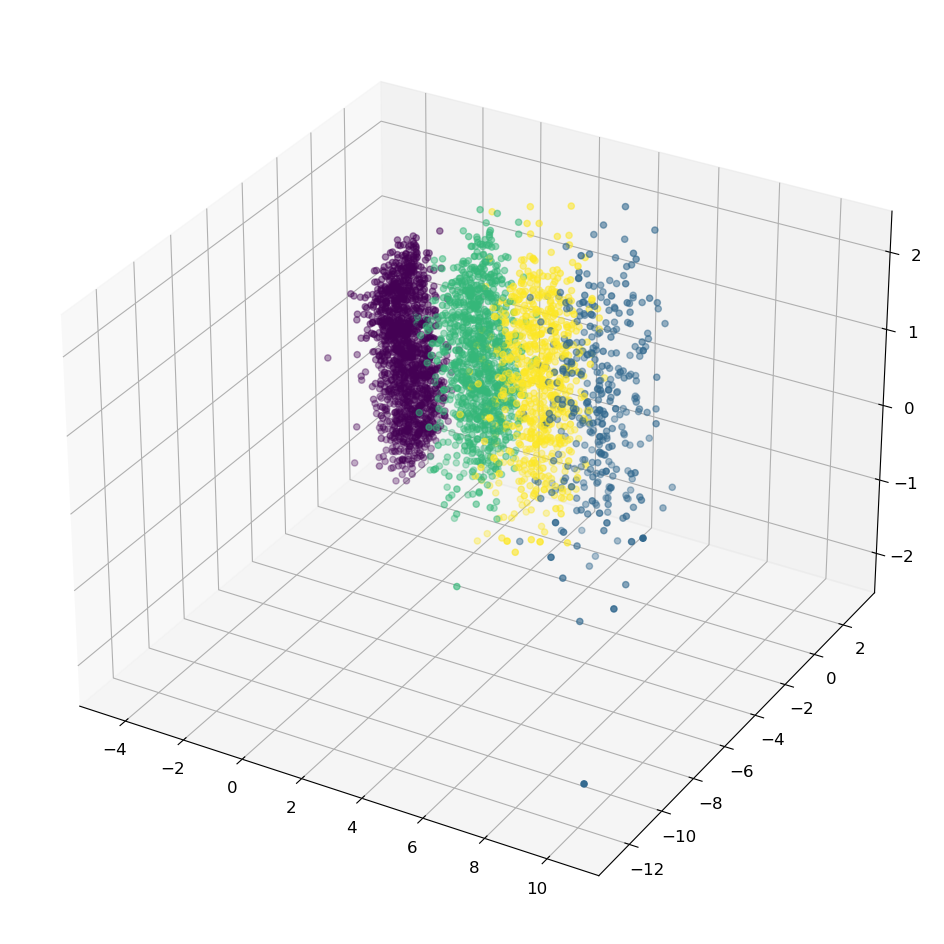

In [14]:
# @title Plot results

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(Z_train[:, 0], Z_train[:, 1], Z_train[:, 2], c=y_train, cmap='viridis')

## Least squares

We first preprocess the data by adding a column of ones at the start of the X matrix (is the x0). We train one Linear regression per class of the target values (in our case 4). For each input, we choose the maximum of the 4 predictions made by the 4 models and we use the index of the model as the predicted class.

In [19]:
# @title Data preprocessing

X_train = np.hstack([np.ones((x_train.shape[0],1)), x_train])
X_test = np.hstack([np.ones((x_test.shape[0],1)), x_test])

def transform_y(y, curr_label):
  Y = np.copy(y)
  idxes = np.where(Y == curr_label)
  idxes_diff = np.where(Y != curr_label)
  Y[idxes_diff] = -1
  Y[idxes] = 1
  return Y

In [20]:
# @title Least squares implementation

class LinearRegression:
  def __init__(self, alpha, iter):
    self.alpha = alpha
    self.iter = iter

  def compute_cost(self, X, y, w):
    m = X.shape[0]
    J = (1/(2.0*m)) * np.sum(np.square(X.dot(w)-y))
    return J

  def predict(self, X, w):
    return np.sign(X.dot(w))

  def fit(self, X, Y):
    N, D = X.shape
    J = np.zeros(self.iter)
    w = np.zeros(D)

    for i in range(self.iter):
      error = X.dot(w)-Y

      w = w - (self.alpha/N) * X.T.dot(error)

      J[i] = self.compute_cost(X, Y, w)

    return w, J

In [21]:
# @title Fit data into models and predict classes

iter = 1500 # @param {type:"integer"}
learning_rate = 0.01 # @param {type:"number"}
K = len(labels)

W = np.zeros((K, X_train.shape[1]))
W_sklearn = np.zeros((K, X_train.shape[1]))
J = np.zeros((K, iter))

# Train one linear regression model per class
for i in range(K):
  Y = transform_y(y_train, i)
  W[i], J[i] = LinearRegression(learning_rate, iter).fit(X_train, Y)
  reg = LinearRegressionSklearn().fit(X_train, Y)
  W_sklearn[i] = reg.coef_


In [22]:
# @title Evaluation

y_pred_train = np.argmax(X_train @ W.T, axis=1)

y_pred = np.argmax(X_test @ W.T, axis=1)
y_pred_sklearn = np.argmax(X_test @ W_sklearn.T, axis=1)

N = X_test.shape[0]
print(f'Total accuracy on train data: {np.mean(y_pred_train==y_train)}')
print(f'Total accuracy on test data (our model): {np.mean(y_pred==y_test)}')
print(f'Total accuracy on test data (sklearn): {np.mean(y_pred_sklearn==y_test)}')

Total accuracy on train data: 0.746
Total accuracy on test data (our model): 0.764
Total accuracy on test data (sklearn): 0.7933333333333333


## Logistic regression

Here we use a MinMax scaler to normalize the input and also include a column of 1s just like in least squares. The target values are converted into 1-of-K encoding. To avoid overfitting, L2 regularization has been used. Finally, we plot the loss across the iterations for the training and test sets.

In [23]:
# @title Data preprocessing

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

X_train = np.hstack([np.ones((x_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((x_test.shape[0],1)), X_test])

T_train = np.eye(np.max(labels)+1)[y_train]
T_test = np.eye(np.max(labels)+1)[y_test]

In [24]:
# @title Logistic regression

def softmax(z, ax=1):
  m = np.max(z, axis=ax, keepdims=True)
  p = np.exp(z-m)
  return (p / np.sum(p, axis=ax, keepdims=True))

class LogisticRegression:
  def __init__(self, lr=0.01, iter=300, tol=1e-6, _lambda=0.0):
    self.lr = lr
    self.iter = iter
    self.tol = tol
    self._lambda = _lambda


  def compute_cost_grad(self, X, T, W):
    E = 0
    N, D = X.shape
    K = T.shape[1]

    y = softmax(X @ W.T)

    E -= np.sum(T * np.log(y))
    E += (self._lambda / 2) * np.sum(np.square(W))

    gradEw = -((T-y).T @ X) + self._lambda * W

    return E, gradEw

  def fit(self, X_train, T_train, X_test, T_test):
    N, D = X_train.shape
    K = T_train.shape[1]
    W = np.zeros((K, D))

    train_costs = []
    test_costs = []
    Ewold = np.inf
    for i in tqdm(range(1, self.iter+1)):
      Ew, gradEw = self.compute_cost_grad(X_train, T_train, W)
      train_costs.append(Ew)

      Ew_test, _ = self.compute_cost_grad(X_test, T_test, W)
      test_costs.append(Ew_test)

      if np.abs(Ew-Ewold) < self.tol:
        break

      W -= self.lr * gradEw
      Ewold = Ew

    return W, train_costs, test_costs

In [25]:
# @title Training

iter = 10000 # @param {type: "integer"}
_lambda = 0.1 # @param {type: "number"}
tolerance = 1e-6
N = X_train.shape[0]
lr = 0.1 / N

clf = LogisticRegression(lr, iter, tolerance, _lambda)
W, train_costs, test_costs = clf.fit(X_train, T_train, X_test, T_test)

clf_sklearn = LogisticRegressionSklearn(random_state=0).fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1106.22it/s]


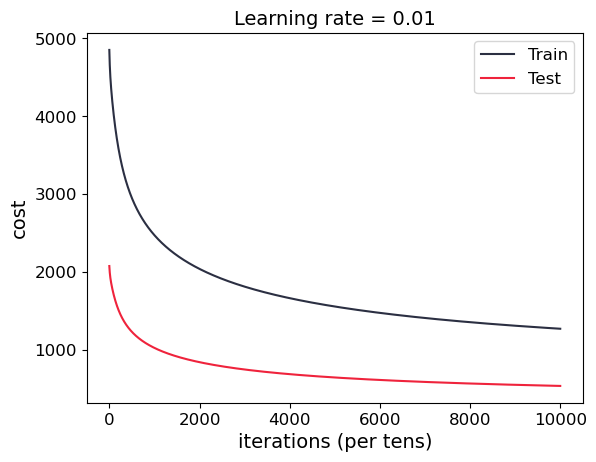

In [26]:
# @title Plot results

plt.plot(np.squeeze(train_costs), color=COLORS[0], label='Train')
plt.plot(np.squeeze(test_costs), color=COLORS[1], label='Test')
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate = 0.01")
plt.legend()
plt.show()

In [27]:
# @title Evaluation

pred_train = np.argmax(softmax(X_train.dot(W.T)), 1)
acc_train = np.mean(pred_train==np.argmax(T_train, 1))

pred = np.argmax(softmax(X_test.dot(W.T)), 1)
acc = np.mean(pred==np.argmax(T_test, 1))

acc_sklearn = clf_sklearn.score(X_test, y_test)
print(f'Accuracy on train data: {acc_train}')
print(f'Accuracy on test data (our model): {acc}')
print(f'Accuracy on test data (sklearn): {acc_sklearn}')

Accuracy on train data: 0.9145714285714286
Accuracy on test data (our model): 0.9333333333333333
Accuracy on test data (sklearn): 0.9293333333333333


## k Nearest Neighbors

We use the Euclidean distance to calculate the distance between two points. For some value of K and for a given input, we choose K points that are closest to the input. We do this for K=[1,10]

In [28]:
# @title kNN Class

def euclidean_dist(x, data):
  return np.sqrt(np.sum((x-data)**2, axis=1))

def majority(items):
  return np.argmax(np.bincount(items))

class kNN:
  def __init__(self, k=5):
    self.k = k

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    neighbors = []
    for x in X:
      dists = euclidean_dist(x, self.X)
      neighbors.append(self.y[np.argsort(dists)[:self.k]])

    return np.array([majority(n) for n in neighbors])

In [29]:
# @title Fit

clfs = []
sklearn_clfs = []

for k in range(1, 11):
  knn = kNN(k=k)
  knn.fit(x_train, y_train)

  knn_sklearn = KNeighborsClassifier(n_neighbors=5)
  knn_sklearn.fit(x_train, y_train)

  clfs.append(knn)
  sklearn_clfs.append(knn_sklearn)

In [30]:
# @title Evaluation

max_acc = 0
max_k = 0
for i in range(len(clfs)):
  pred_train = clfs[i].predict(x_train)
  acc_train = np.mean(pred_train == y_train)

  pred = clfs[i].predict(x_test)
  acc = np.mean(pred == y_test)

  pred_sklearn = sklearn_clfs[i].predict(x_test)
  acc_sklearn = np.mean(pred_sklearn == y_test)
  print(f'Accuracy of kNN on train data for k={i+1}: {acc_train}')
  print(f'Accuracy of kNN (our model) for k={i+1}: {acc}')
  print(f'Accuracy of kNN (sklearn) for k={i+1}: {acc_sklearn}')
  print()
  if acc > max_acc:
    max_acc = acc
    max_k = i+1

print(f'Maximum accuracy: {max_acc} for k={max_k}')

Accuracy of kNN on train data for k=1: 1.0
Accuracy of kNN (our model) for k=1: 0.9133333333333333
Accuracy of kNN (sklearn) for k=1: 0.932

Accuracy of kNN on train data for k=2: 0.944
Accuracy of kNN (our model) for k=2: 0.9106666666666666
Accuracy of kNN (sklearn) for k=2: 0.932

Accuracy of kNN on train data for k=3: 0.9528571428571428
Accuracy of kNN (our model) for k=3: 0.9273333333333333
Accuracy of kNN (sklearn) for k=3: 0.932

Accuracy of kNN on train data for k=4: 0.94
Accuracy of kNN (our model) for k=4: 0.926
Accuracy of kNN (sklearn) for k=4: 0.932

Accuracy of kNN on train data for k=5: 0.9445714285714286
Accuracy of kNN (our model) for k=5: 0.932
Accuracy of kNN (sklearn) for k=5: 0.932

Accuracy of kNN on train data for k=6: 0.9391428571428572
Accuracy of kNN (our model) for k=6: 0.932
Accuracy of kNN (sklearn) for k=6: 0.932

Accuracy of kNN on train data for k=7: 0.9402857142857143
Accuracy of kNN (our model) for k=7: 0.9266666666666666
Accuracy of kNN (sklearn) for k

## Naive Bayes

We use Gaussian Naive Bayes in which the likelihood is equal to the product of N independent Gaussian distributions with means equal to the average number of data points with target equal to the current target value, similarly for variance/std. Each class has its own mean and std. and the prediction is the class with the highest posterior probability.

In [31]:
# @title Gaussian Naive Bayes class

def gaussian(x, mean, std):
  a = (1/np.sqrt(2*np.pi*np.square(std)))
  b = np.exp(-np.square(x-mean)/(2*np.square(std)))

  return a * b

class GaussianNaiveBayes:
  def fit(self, X, y):
    self.K = len(np.unique(y))
    N, D = X.shape

    self.means = np.zeros((K, D))
    self.stds = np.zeros((K, D))
    self.priors = np.bincount(y) / N

    for i in range(K):
      self.means[i] = X[np.where(y==i)].mean(axis=0)
      self.stds[i] = X[np.where(y==i)].std(axis=0)

  def predict(self, X):
    N, D = X.shape
    posteriors = np.zeros((self.K, N))

    for i in range(self.K):
      likelihood = np.prod(gaussian(X, self.means[i], self.stds[i]), axis=1)
      posteriors[i] = likelihood * self.priors[i]

    return np.argmax(posteriors, axis=0)

In [32]:
# @title Fit

GNB = GaussianNaiveBayes()
GNB.fit(x_train, y_train)

GNB_sklearn = GaussianNB()
GNB_sklearn.fit(x_train, y_train)

GaussianNB()

In [33]:
# @title Evaluation

pred_train = GNB.predict(x_train)
acc_train = np.mean(pred == y_test)

pred = GNB.predict(x_test)
acc = np.mean(pred == y_test)

pred_sklearn = GNB_sklearn.predict(x_test)
acc_sklearn = np.mean(pred_sklearn == y_test)

print(f'Accuracy of Gaussian Naive Bayes on train data: {acc_train}')
print(f'Accuracy of Gaussian Naive Bayes (our model): {acc}')
print(f'Accuracy of Gaussian Naive Bayes (sklearn): {acc_sklearn}')

Accuracy of Gaussian Naive Bayes on train data: 0.93
Accuracy of Gaussian Naive Bayes (our model): 0.928
Accuracy of Gaussian Naive Bayes (sklearn): 0.928


## Multi-layer Perceptron

To avoid long training times, we use stochastic gradient descent. During data preprocessing we convert numpy arrays to tensors to avoid errors with Torch, and we encode target values with 1-of-K encoding. The MLP has one hidden layer with D nodes and a Tanh activation function. We use cross-entropy loss and SGD optimizer. We plot the cross-entropy loss for training and testing data.

In [34]:
# @title Data preprocessing

X_train = torch.from_numpy(x_train).float()
Y_train = torch.from_numpy(np.eye(np.max(labels)+1)[y_train]).float()

X_test = torch.from_numpy(x_test).float()
Y_test = torch.from_numpy(np.eye(np.max(labels)+1)[y_test]).float()

In [35]:
# @title Model

class Classifier(nn.Module):
  def __init__(self, num_inputs, num_hidden, num_outputs):
    super().__init__()

    self.linear1 = nn.Linear(num_inputs, num_hidden)
    self.act_fn = nn.Tanh()
    self.linear2 = nn.Linear(num_hidden, num_outputs)

  def forward(self, x):
    x = self.act_fn(self.linear1(x))
    x = self.linear2(x)
    return x

num_inputs = X_train.shape[1]
num_hidden = 10 # @param {type: "integer"}
num_outputs = len(np.unique(y_train))

model = Classifier(num_inputs, num_hidden, num_outputs)

In [36]:
# @title Train MLP

def train(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, epochs):
  model.train()
  train_loss = []
  test_loss = []

  for epoch in tqdm(range(epochs)):
    output_tain = model(X_train)

    loss = loss_fn(output_tain, y_train)
    train_loss.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      output_test = model(X_test)
      loss_test = loss_fn(output_test, y_test)
      test_loss.append(loss_test.item())

  return train_loss, test_loss

epochs = 2000 # @param {type: "integer"}
learning_rate = 0.1 # @param {type: "number"}
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_loss, test_loss = train(model, optimizer, loss, X_train, Y_train, X_test, Y_test, epochs)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 710.12it/s]


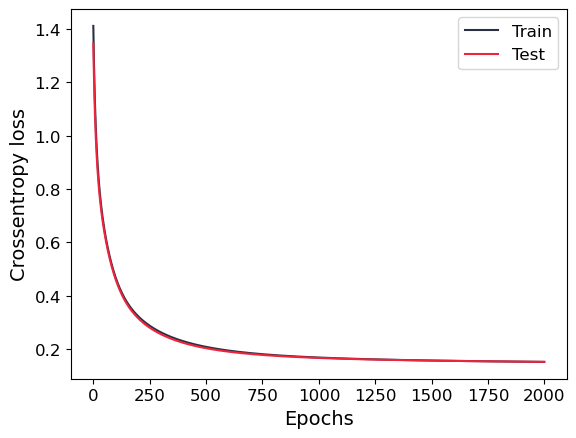

In [37]:
# @title Training loss

plt.plot(np.squeeze(train_loss), color=COLORS[0], label='Train')
plt.plot(np.squeeze(test_loss), color=COLORS[1], label='Test')
plt.ylabel('Crossentropy loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [38]:
# @title Evaluation

y_pred_train = model(X_train)
acc_train = (torch.argmax(y_pred_train, 1)==torch.argmax(Y_train, 1)).float().mean()

y_pred = model(X_test)
ce = loss(y_pred, Y_test)
acc = (torch.argmax(y_pred, 1)==torch.argmax(Y_test, 1)).float().mean()

print(f'Accuracy of MLP on train data: {acc_train}')
print(f'Accuracy of MLP on test data: {acc}')

Accuracy of MLP on train data: 0.943142831325531
Accuracy of MLP on test data: 0.9413333535194397


## Support Vector Machine

We create a normal SVM classifier for two classes. To be able to classify K classes, we train one classifier for each of the K classes and as prediction we choose the index of the classifier with the highest score. Target values are transformed such that each value that corresponds to the current target value is equal to 1 while all the other classes become equal to -1. We again use regularization.

In [39]:
# @title SVM Class

class SVM:
  def __init__(self, lr=0.001, _lambda=0.01, iter=1000):
    self.lr = lr
    self._lambda = _lambda
    self.iter = iter
    self.w = None
    self.b = None
    self.line = []

  def fit(self, X, y):
    N, M = X.shape

    self.w = np.zeros(M)
    self.b = 0

    for _ in tqdm(range(self.iter)):
      for i, x_i in enumerate(X):
        if y[i] * (np.dot(x_i, self.w) - self.b) >= 1:
          self.w -= self.lr * (2 * self._lambda * self.w)
        else:
          self.w -= self.lr * (2 * self._lambda * self.w - np.dot(x_i, y[i]))
          self.b -= self.lr * y[i]

  def predict(self, X):
    return np.dot(X, self.w) - self.b

In [ ]:
# @title Train SVMs

lr = 0.001 # @param {type: "number"}
_lambda = 0.01 # @param {type: "number"}
iter = 1000 # @param {type: "integer"}

classifiers = [SVM(lr, _lambda, iter) for _ in range(len(labels))]
sklearn_clfs = [svm.SVC(kernel='linear') for _ in range(len(labels))]

for i in range(len(classifiers)):
  print(f'{i+1}/{len(classifiers)}')
  Y = transform_y(y_train, i)
  classifiers[i].fit(X_train, Y)
  sklearn_clfs[i].fit(X_train, Y)

1/4


 24%|███████████████████████████████▋                                                                                                    | 240/1000 [00:11<00:37, 20.53it/s]

In [ ]:
# @title Predict

pred_train = np.argmax(np.array([clf.predict(X_train) for clf in classifiers]), axis=0)
pred = np.argmax(np.array([clf.predict(X_test) for clf in classifiers]), axis=0)
pred_sklearn = np.argmax(np.array([clf.predict(X_test) for clf in sklearn_clfs]), axis=0)

In [ ]:
# @title Evaluation

acc_train = np.mean(pred_train == y_train)
acc = np.mean(pred == y_test)
acc_sklearn = np.mean(pred_sklearn == y_test)
print(f'Accuracy of SVM on train data: {acc_train}')
print(f'Accuracy of SVM (our model): {acc}')
print(f'Accuracy of SVM (sklearn): {acc_sklearn}')

## k-Means

We use a normal K-means algorithm which stops iterating until there are no changes to the centroids between the current and the previous iteration or until the max number of iterations are reached. The K=number of classes. As a sidenote, the initialization of clusters plays an important role to the accuracy as they are randomized to correspond to a data point (so different seeds can have different results).

In [ ]:
# @title K-means algorithm

def euclidean_dist(x, data):
  return np.sqrt(np.sum((x-data)**2, axis=1))

class KMeans:
  def __init__(self, K=5, iter=300, seed=0):
    self.K = K
    self.iter = iter
    self.seed = seed

  def fit(self, X):
    N, D = X.shape
    np.random.seed(self.seed)
    self.centroids = X[np.random.choice(N, self.K, replace=False)]

    curr_iter = 0
    prev_centroids = None

    for i in tqdm(range(self.iter)):
      if np.equal(prev_centroids, self.centroids).all(): break

      new_clusters = [[] for _ in range(self.K)]
      for x in X:
        dists = euclidean_dist(x, self.centroids)
        idx = np.argmin(dists)
        new_clusters[idx].append(x)

      prev_centroids = self.centroids
      self.centroids = np.array([np.mean(cluster, axis=0) for cluster in new_clusters])
      curr_iter += 1

  def predict(self, X):
    centroids = []
    centroid_idxs = []
    for x in X:
      dists = euclidean_dist(x, self.centroids)
      idx = np.argmin(dists)
      centroids.append(self.centroids[idx])
      centroid_idxs.append(idx)
    return np.array(centroid_idxs)


In [ ]:
# @title Fit data

kmeans = KMeans(K=len(labels), seed=10)
kmeans.fit(x_train)

kmeans_sklearn = cluster.KMeans(n_clusters=len(labels), init='random', random_state=0)
kmeans_sklearn.fit(x_train)

  6%|████████▍                                                                                                                             | 19/300 [00:00<00:10, 28.00it/s]


KMeans(init='random', n_clusters=4, random_state=0)

In [ ]:
# @title Evaluation

pred_train = kmeans.predict(x_train)
pred = kmeans.predict(x_test)
pred_sklearn = kmeans_sklearn.predict(x_test)

acc_train = np.mean(pred_train == y_train)
acc = np.mean(pred == y_test)
acc_sklearn = np.mean(pred_sklearn == y_test)

print(f'Accuracy of K-means on train data: {acc_train}')
print(f'Accuracy of K-means (our model): {acc}')
print(f'Accuracy of K-means (sklearn): {acc_sklearn}')

Accuracy of K-means on train data: 0.34685714285714286
Accuracy of K-means (our model): 0.348
Accuracy of K-means (sklearn): 0.48933333333333334
